In [1]:
import pandas as pd
import numpy as np 

url="https://raw.githubusercontent.com/alexsong77/DAV-5400/master/diamonds.csv"
diamonds = pd.read_csv(url)
diamonds.head()

# Narrative
<p>1. Count the total number of diamonds, then count the number of diamonds that carat between 0.30 and 1.08. Finally, using the number of diamonds that carat between 0.30 and 1.08 divided by the total numbers of diamonds.
<p>2.Find out all of rows that have a equal value of x and y.
<P>3.Find out the mean carat value and create a column contains all of carat value less than the mean carat value and count how many of that column
<p>4.Find out the total number of diamonds either have a premium cut or ideal cut
<p>5.Using the price/carat to get price per carat for all of rows and creat a column to contain it. Then using max functions to pull out the highest price per carat.
<p>6.Groupby all of the categories under "cut" column and count the frequency by using plot bar to show the result.
<p>7.Create a box plot by set x ="cut" and y = "price" to see the diamond price for each cut
<p>8.Create four seperate histogram plots by set x-axis = length, width, depth, and total depth percentage and y-axis = frequency 
<p>9.Create a scatter plot by set x="price" and y="carat" to see the relationship between this two variables.

In [11]:
# Take a look at this dataset to check everything run through correctly.
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [65]:
# Extract all of carats from this dataset and count the total number of diamonds
total_carat = diamonds['carat']
total = total_carat.count()
total

53940

In [66]:
# Create a column "special_carat" and Count that column - the total number of diamonds that only > 0.30 and < 1.08
special_carat = diamonds.carat[(diamonds.carat>0.30) & (diamonds.carat<1.08)]
special = special_carat.count()
special

37434

In [69]:
# Calculate the proportion of diamonds are between .30 and 1.08 carats by using special/total 
proportion_carat = (special/total)
proportion_carat

0.6939933259176864

In [79]:
# Create a column to contain all of diamonds that x column equal to y column and count how many of that column. 
diamonds_xy = diamonds[diamonds.x == diamonds.y]
diamonds_xy.carat.count()

17

In [89]:
# Calculate the carat mean
carat_mean = diamonds.carat.mean()
carat_mean
# Create a column "special_carat1" that contains all of carat values less than the carat mean
special_carat1 = diamonds.carat[diamonds.carat<carat_mean]
special_carat1.count()

31127

In [94]:
# Create a column "special_carat2" and Count that column - have a Premium cut or Ideal cut
special_carat2 = diamonds.cut[(diamonds.cut=='Premium') | (diamonds.cut=='Ideal')]
special_carat2.count()

35342

In [165]:
# Create a column "price_carat" by using column "price" / column "carat" to get the price per carat 
price_carat = diamonds.price/diamonds.carat 
# Test to see if get the corret results 
price_carat.head()
print(price_carat.max(),price_carat.idxmax())
# The diamonds index 27635 has the highest price per carat 17828.846153846152

17828.846153846152 27635


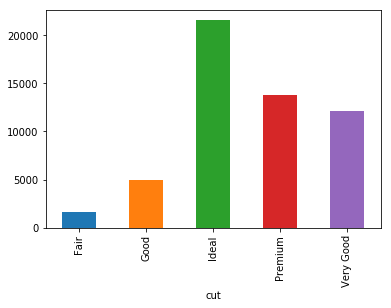

In [113]:
# Groupby each categories under "cut" and create a table to contain the values 
cut_diamonds = diamonds.groupby(['cut'])
# Count each categories by the frequencies 
count_cut = cut_diamonds['cut'].count()
# Create a barplot to show the visualized results 
count_cut.plot.bar()

#The result tell us "Ideal" has the most frequencies and "Fair" has the least frequencies

In [121]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

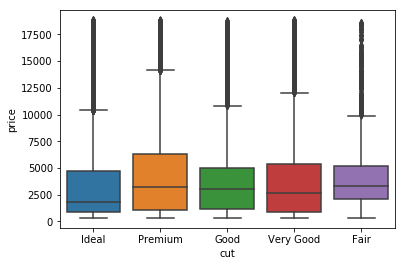

In [128]:
# Create a boxplot by name it with "boxplot" to show the x-axis = cut and y-axis = price. 
boxplot = sns.boxplot(x="cut", y="price", data=diamonds)

Firstly, the "Ideal" cut and "Fair" cut both have the most outliers, the "Ideal" makes sense since it has the highest quality, but the "Fair" cut doesn't make sense, the company may overprice the "Fair" cut diamonds. Secondly, the"Premium" cut has the highest median. Thirdly, the "Premium" cut has the highest price range among others, and most of "Premium" cut has a higher price even greater than "Ideal" cut, so the company should increase the "Ideal" price and lower a little bit "premium" price. 

Text(0, 0.5, 'Frequency')

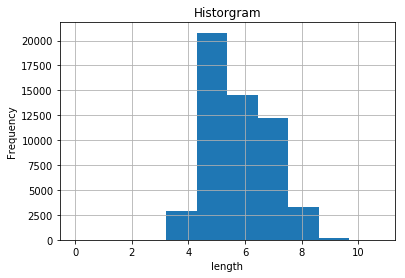

In [160]:
# Create a historgram by showing the x-axis = length and y-axis = Frequency. 
his_plot = diamonds['x'].hist(bins=10)
his_plot.set_title('Historgram')
his_plot.set_xlabel('length')
his_plot.set_ylabel('Frequency')
# The length range between 4 to 6 has the most distribution frequency 

Text(0, 0.5, 'Frequency')

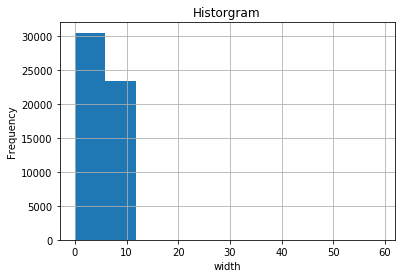

In [157]:
# Create a historgram by showing the x-axis = width and y-axis = Frequency.
his_plot = diamonds['y'].hist(bins=10)
his_plot.set_title('Historgram')
his_plot.set_xlabel('width')
his_plot.set_ylabel('Frequency')
# The width are in a range 0 to 10, and the width range "0 to 5" has the most distribution frequency. 

Text(0, 0.5, 'Frequency')

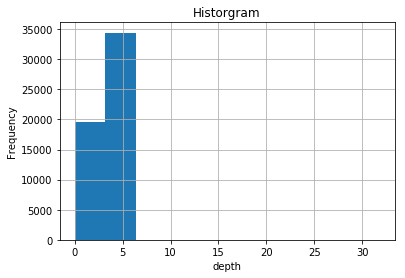

In [162]:
# Create a historgram by showing the x-axis = depth and y-axis = Frequency.
his_plot = diamonds['z'].hist(bins=10)
his_plot.set_title('Historgram')
his_plot.set_xlabel('depth')
his_plot.set_ylabel('Frequency')
# The depth are in a range 0 to 5, and the range "0 to 2.5" has the most distribution frequency. 

Text(0, 0.5, 'Frequency')

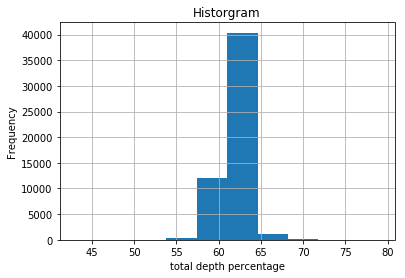

In [163]:
# Create a historgram by showing the x-axis = total depth percentage and y-axis = Frequency.
his_plot = diamonds['depth'].hist(bins=10)
his_plot.set_title('Historgram')
his_plot.set_xlabel('total depth percentage')
his_plot.set_ylabel('Frequency')
# Most of diamond's total depth percentage are in the range 60% t0 65%

No handles with labels found to put in legend.


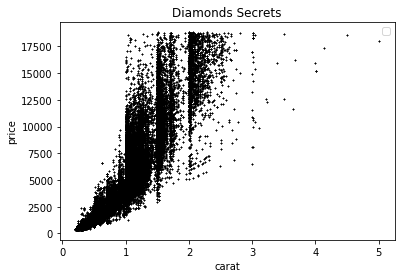

In [154]:
# Make a histogram chart by setting x-axis = carat and y-axis = price
scatter_plot = diamonds.plot.scatter('carat','price',color = 'k', s=1, marker = "x")
plt.ylabel('price')
plt.xlabel('carat')
plt.title('Diamonds Secrets')
plt.legend()
plt.show()

# It's a positive relationship